In [2]:
import os
import zipfile

# Make a kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json into this folder
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d thecarbyneuniverse/cats-vs-dogs


Dataset URL: https://www.kaggle.com/datasets/thecarbyneuniverse/cats-vs-dogs
License(s): unknown
 97% 766M/788M [00:02<00:00, 253MB/s]
100% 788M/788M [00:02<00:00, 349MB/s]


In [4]:
with zipfile.ZipFile("cats-vs-dogs.zip","r") as z:
    z.extractall("data")


In [5]:
print(os.listdir("data"))


['PetImages', 'readme[1].txt', 'MSR-LA - 3467.docx']


In [6]:
!unzip cats-vs-dogs.zip -d data


Streaming output truncated to the last 5000 lines.
  inflating: data/PetImages/Dog/550.jpg  
  inflating: data/PetImages/Dog/5500.jpg  
  inflating: data/PetImages/Dog/5501.jpg  
  inflating: data/PetImages/Dog/5502.jpg  
  inflating: data/PetImages/Dog/5503.jpg  
  inflating: data/PetImages/Dog/5504.jpg  
  inflating: data/PetImages/Dog/5505.jpg  
  inflating: data/PetImages/Dog/5506.jpg  
  inflating: data/PetImages/Dog/5507.jpg  
  inflating: data/PetImages/Dog/5508.jpg  
  inflating: data/PetImages/Dog/5509.jpg  
  inflating: data/PetImages/Dog/551.jpg  
  inflating: data/PetImages/Dog/5510.jpg  
  inflating: data/PetImages/Dog/5511.jpg  
  inflating: data/PetImages/Dog/5512.jpg  
  inflating: data/PetImages/Dog/5513.jpg  
  inflating: data/PetImages/Dog/5514.jpg  
  inflating: data/PetImages/Dog/5515.jpg  
  inflating: data/PetImages/Dog/5516.jpg  
  inflating: data/PetImages/Dog/5517.jpg  
  inflating: data/PetImages/Dog/5518.jpg  
  inflating: data/PetImages/Dog/5519.jpg  
  inf

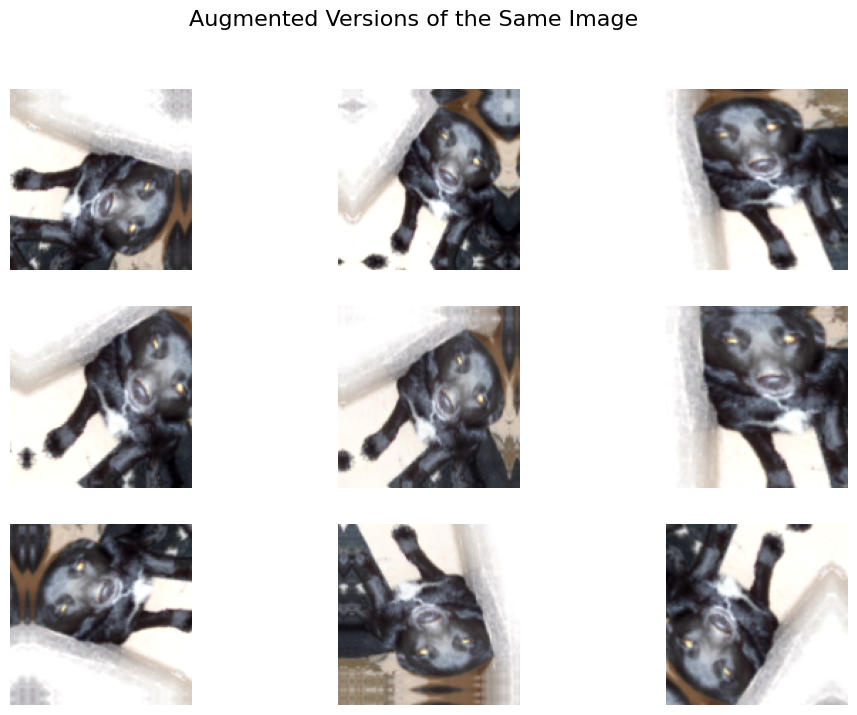

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load one image
# -----------------------------
img_path = "data/PetImages/Dog/10000.jpg"   # change path to your own image
img = keras.utils.load_img(img_path, target_size=(128, 128))
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # shape (1, 128, 128, 3)

# -----------------------------
# 2. Define Data Augmentation Pipeline
# -----------------------------
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.2),
])

# -----------------------------
# 3. Apply Augmentations multiple times
# -----------------------------
plt.figure(figsize=(12, 8))

for i in range(9):
    augmented_img = data_augmentation(img_array)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.cast(augmented_img[0], tf.uint8))
    plt.axis("off")

plt.suptitle("Augmented Versions of the Same Image", fontsize=16)
plt.show()
